In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as ply
import pandas as pd
from dateutil import parser
import pytz
import plotly.express as px


In [8]:
data = pd.read_csv('order_items.csv')
data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,16000,10975,8831,13606,43216,Complete,2020-09-14 17:59:04 UTC,2020-09-16 12:05:00 UTC,2020-09-17 21:47:00 UTC,NaN,2.5
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00 UTC,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49 UTC,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45 UTC,2023-06-04 17:26:00 UTC,NaN,NaN,3.0
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34 UTC,2023-06-29 16:56:00 UTC,NaN,NaN,3.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180976 non-null  int64  
 1   order_id           180976 non-null  int64  
 2   user_id            180976 non-null  int64  
 3   product_id         180976 non-null  int64  
 4   inventory_item_id  180976 non-null  int64  
 5   status             180976 non-null  object 
 6   created_at         180976 non-null  object 
 7   shipped_at         118302 non-null  object 
 8   delivered_at       63484 non-null   object 
 9   returned_at        18117 non-null   object 
 10  sale_price         180976 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.2+ MB


In [10]:
data['created_at'] = data['created_at'].map(parser.parse)
data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,16000,10975,8831,13606,43216,Complete,2020-09-14 17:59:04+00:00,2020-09-16 12:05:00 UTC,2020-09-17 21:47:00 UTC,NaN,2.5
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype                  
---  ------             --------------   -----                  
 0   id                 180976 non-null  int64                  
 1   order_id           180976 non-null  int64                  
 2   user_id            180976 non-null  int64                  
 3   product_id         180976 non-null  int64                  
 4   inventory_item_id  180976 non-null  int64                  
 5   status             180976 non-null  object                 
 6   created_at         180976 non-null  datetime64[ns, tzutc()]
 7   shipped_at         118302 non-null  object                 
 8   delivered_at       63484 non-null   object                 
 9   returned_at        18117 non-null   object                 
 10  sale_price         180976 non-null  float64                
dtypes: datetime64[ns, tzutc()](1), float64(

In [12]:
data['status'].value_counts()

status
Shipped       54818
Complete      45367
Processing    35727
Cancelled     26947
Returned      18117
Name: count, dtype: int64

<Axes: title={'center': 'Status Distribution'}, ylabel='count'>

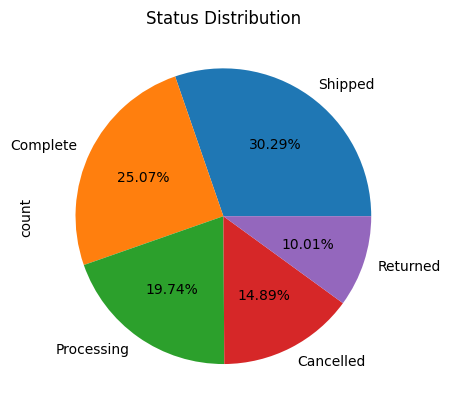

In [13]:
data['status'].value_counts().plot.pie(title='Status Distribution',autopct='%.2f%%')

In [14]:
value_counts = data ['status'].value_counts().to_dict()
value_counts

{'Shipped': 54818,
 'Complete': 45367,
 'Processing': 35727,
 'Cancelled': 26947,
 'Returned': 18117}

In [15]:
count_value = list(value_counts.values())
count_labels = list(value_counts.keys())
count_value

[54818, 45367, 35727, 26947, 18117]

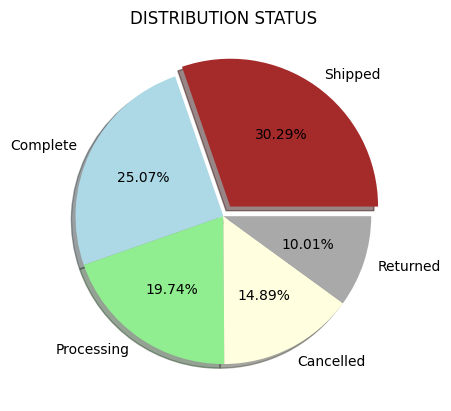

In [16]:
explode = [0.08, 0.0, 0.0, 0.0, 0.0]
colors = ['brown','lightblue','lightgreen','lightyellow','darkgrey']
plt.pie (count_value,
         explode=explode,
        labels=count_labels,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.title('DISTRIBUTION STATUS', fontsize=12)
plt.show()

In [17]:
fig = ply.graph_objs.Figure(
    data=[
        ply.graph_objs.Pie(labels=count_labels,values=count_value,pull=explode)]
    )
fig.update_layout(title_text='Status Distribution')
fig.show()

In [18]:
data['created_at'][0].hour

17

In [19]:
data['hour'] = data['created_at'].map(lambda ts: ts.hour)
data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,hour
0,16000,10975,8831,13606,43216,Complete,2020-09-14 17:59:04+00:00,2020-09-16 12:05:00 UTC,2020-09-17 21:47:00 UTC,NaN,2.5,17
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5,6
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5,5
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0,17
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0,5


In [20]:
grouped_hour = data.groupby(['hour']) ['id'].count()
grouped_hour

hour
0     9482
1     9220
2     9352
3     9617
4     9631
5     9705
6     9577
7     9628
8     9404
9     9581
10    9402
11    9445
12    9350
13    9648
14    9482
15    8794
16    6574
17    4004
18    1647
19      51
20     756
21    3209
22    5462
23    7955
Name: id, dtype: int64

<Axes: title={'center': 'Order Hours'}, xlabel='Hour', ylabel='count'>

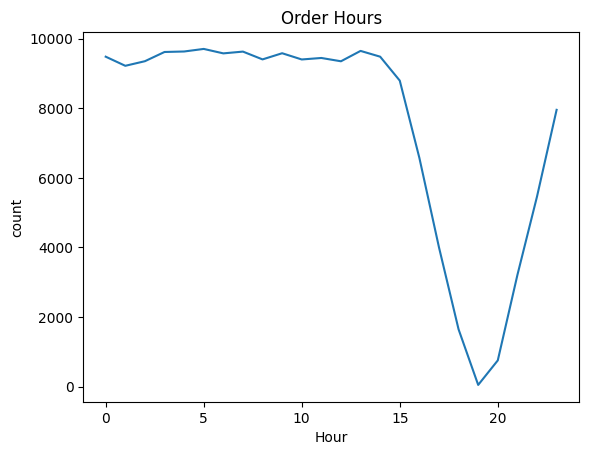

In [21]:
grouped_hour.plot.line(title='Order Hours',xlabel='Hour', ylabel='count')

<Axes: title={'center': 'Order Hours'}, xlabel='Hour', ylabel='count'>

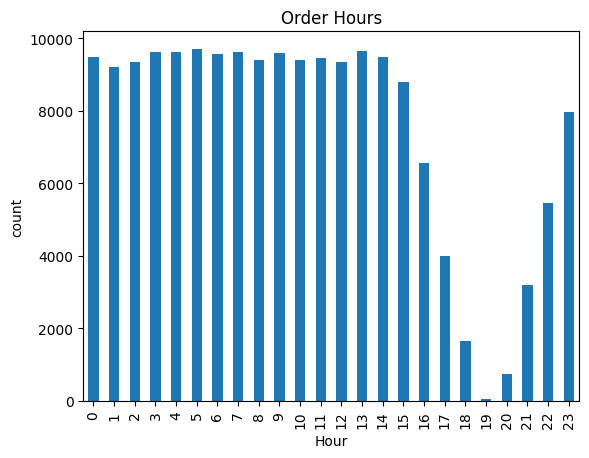

In [22]:
grouped_hour.plot.bar(title='Order Hours',xlabel='Hour',ylabel='count')

<Axes: title={'center': 'Order Hours'}, xlabel='Hour', ylabel='count'>

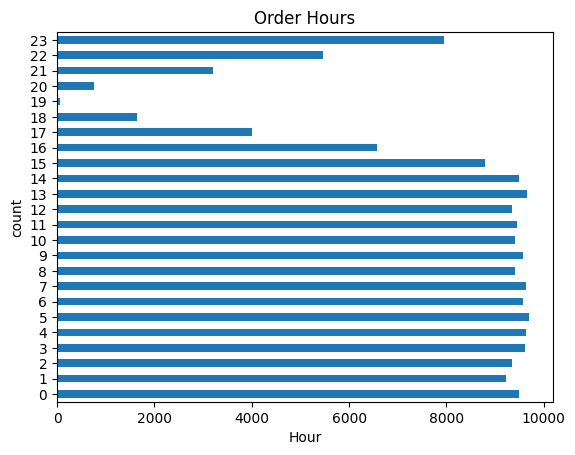

In [23]:
grouped_hour.plot.barh(title='Order Hours',xlabel='Hour',ylabel='count')

In [24]:
fig = ply.graph_objs.Figure(
    data=[
        ply.graph_objs.Pie(labels=list(grouped_hour.to_dict().keys()), values=list(grouped_hour.to_dict().values()))]
    )
fig.update_layout(title_text='Order Hour')
fig.show()

In [25]:
data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,hour
0,16000,10975,8831,13606,43216,Complete,2020-09-14 17:59:04+00:00,2020-09-16 12:05:00 UTC,2020-09-17 21:47:00 UTC,NaN,2.5,17
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5,6
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5,5
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0,17
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0,5


In [26]:
data['year'] = data['created_at'].map(lambda ts: ts.year)
data.year.max(),data.year.min()

(2023, 2019)

In [27]:
latest_data = data[data['year'] == data.year.max()].copy()
latest_data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,hour,year
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5,6,2023
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5,5,2023
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0,17,2023
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0,5,2023
6,169379,116754,93660,28951,457617,Shipped,2023-06-22 00:03:48+00:00,2023-06-22 02:44:00 UTC,NaN,NaN,3.0,0,2023


In [28]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76333 entries, 1 to 180975
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype                  
---  ------             --------------  -----                  
 0   id                 76333 non-null  int64                  
 1   order_id           76333 non-null  int64                  
 2   user_id            76333 non-null  int64                  
 3   product_id         76333 non-null  int64                  
 4   inventory_item_id  76333 non-null  int64                  
 5   status             76333 non-null  object                 
 6   created_at         76333 non-null  datetime64[ns, tzutc()]
 7   shipped_at         49824 non-null  object                 
 8   delivered_at       26809 non-null  object                 
 9   returned_at        7718 non-null   object                 
 10  sale_price         76333 non-null  float64                
 11  hour               76333 non-null  int64                  

In [29]:
latest_data.created_at.min(), latest_data.created_at.max()

(Timestamp('2023-01-01 00:05:32+0000', tz='tzutc()'),
 Timestamp('2023-08-22 19:16:34.387537+0000', tz='tzutc()'))

In [30]:
latest_data['month'] = latest_data['created_at'].map(lambda ts:ts.month)
latest_data.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,hour,year,month
1,58903,40591,32637,13606,159361,Complete,2023-07-26 06:59:00+00:00,2023-07-28 07:38:00 UTC,2023-08-01 06:03:00 UTC,NaN,2.5,6,2023,7
2,160715,110826,88857,13606,434265,Returned,2023-07-11 05:19:49+00:00,2023-07-12 13:45:00 UTC,2023-07-12 21:41:00 UTC,2023-07-13 21:15:00 UTC,2.5,5,2023,7
3,40331,27796,22443,28951,109154,Shipped,2023-06-01 17:44:45+00:00,2023-06-04 17:26:00 UTC,NaN,NaN,3.0,17,2023,6
4,83959,57928,46609,28951,227036,Shipped,2023-06-28 05:57:34+00:00,2023-06-29 16:56:00 UTC,NaN,NaN,3.0,5,2023,6
6,169379,116754,93660,28951,457617,Shipped,2023-06-22 00:03:48+00:00,2023-06-22 02:44:00 UTC,NaN,NaN,3.0,0,2023,6


In [31]:
grouped_data = latest_data.groupby(
    by=['month','user_id'])['id'].count().reset_index(
            name='count').sort_values(
        ['month','count'],
        ascending = False
).copy()
grouped_data.head()

,month,user_id,count
43207,8,26771,12
45517,8,56439,11
41088,8,207,10
41155,8,977,10
41981,8,11134,10


In [32]:
grouped_data["rank"] = grouped_data.groupby(by=['month'])["count"].rank(method="first",ascending=False)
grouped_data.head()

,month,user_id,count,rank
43207,8,26771,12,1.0
45517,8,56439,11,2.0
41088,8,207,10,3.0
41155,8,977,10,4.0
41981,8,11134,10,5.0


In [34]:
top3 = grouped_data.query("rank <= 3").sort_values(['month','rank'], ascending=[False,True].copy())
top3['rank'] = top3['rank'].map(int)
top3.head()

,month,user_id,count,rank
43207,8,26771,12,1
45517,8,56439,11,2
41088,8,207,10,3
34067,7,14748,8,1
34338,7,18178,8,2


In [35]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 43207 to 1583
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   month    24 non-null     int64
 1   user_id  24 non-null     int64
 2   count    24 non-null     int64
 3   rank     24 non-null     int64
dtypes: int64(4)
memory usage: 960.0 bytes


In [37]:
fig = px.bar(top3[['month','count','rank','user_id']], x='month', y='count',
             hover_data=['user_id'],
             color='rank',
             barmode='group',
             title='TOP 3 MONTHLY IN THE LAST YEAR (2023)',
             height=400)
fig.show()

<Axes: xlabel='Colum_name', ylabel='value'>

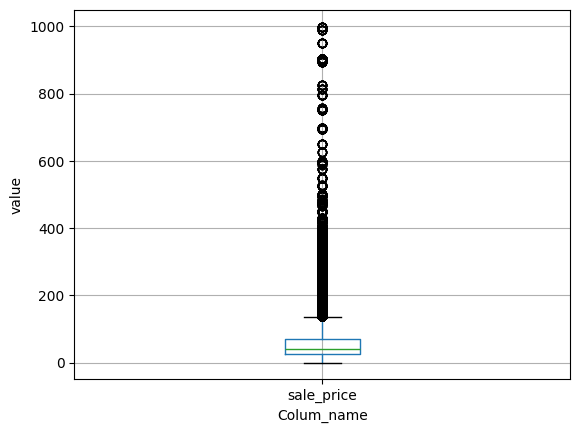

In [38]:
data.boxplot(('sale_price'), xlabel="Colum_name", ylabel='value')